## Testing the BPASS isochrone at $10^{8.2}$ years age and Comparing With Parsec (Solar Metallicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for $10^{8.2}$ years age, solar metallicity, AKs=0.0, and distance of 100 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram ($B-V$ vs $M_V$), and the mass luminosity relationship of the cluster. The BPASS isochrone is compared to a Parsec isochrone in this notebook.

## Note: This notebook can also be used for demonstration of how the new Isochrone_Binary and Binary_Cluster can be used

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
iso1 = synthetic.Isochrone_Binary(8.2, 0.0, 100,math.log10(1), mass_sampling=1)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1794: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to T= 50000 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 44758 logg=8.49
Changing to logg=5.00 for T= 36146 logg=8.54
Changing to logg=5.00 for T= 38774 logg=8.52
Changing to logg=5.00 for T= 38361 logg=8.50
Changing to T= 50000 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 37966 logg=5.70
Changing to logg=5.00 for T= 39842 logg=5.51
Changing to logg=5.00 for T= 32888 logg=5.68
Changing to logg=5.00 for T= 45669 logg=8.52
Changing to logg=5.00 for T= 35701 logg=8.52
Changing to logg=5.00 for T= 37547 logg=5.70
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 38974 logg=5.38
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to 

Check if all of the phases represented in the isochrone are valid.

In [2]:
import numpy as np
np.all([(x == 5 or x == 101 or x == 102 or x ==103) for
        x in iso1.primaries['phase']])

True

In [3]:
np.all([(x == 5 or x == 101  or x == 102 or x == 103) for
        x in iso1.singles['phase']])

True

In [4]:
np.all([(x == 5 or x == 101 or x == -99  or x == 102 or x == 103) for
        x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries and secondaries accounting for NaNs in the columns. (For max we make NaNs the same as - infinity and for median and mean, we do not include them)

In [5]:
np.max(iso1.singles['logg'])

9.294869501162154

In [6]:
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.288600394549206

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

9.283702439639246

In [8]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.2498758947769355

In [9]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.133548174454043

In [10]:
np.median(iso1.secondaries['logg'][[np.where(~np.isnan(iso1.secondaries['logg']))]])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


4.298445675989428

In [11]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

5.354531279865074

In [12]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

5.109131776599373

In [13]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

4.7087761944824305

Let's make a histogram of log_g values for each table of the isochrone

Text(0.5, 0, 'logg in cgs')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


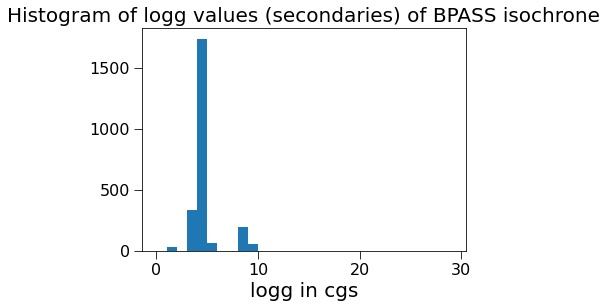

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

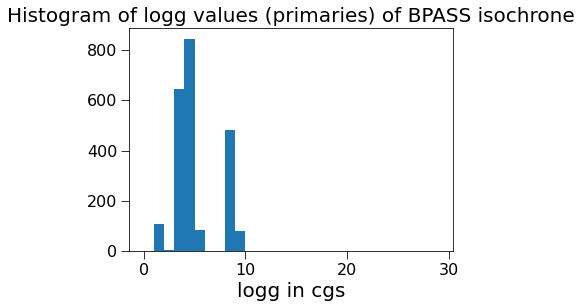

In [15]:
plt.title("Histogram of logg values (primaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

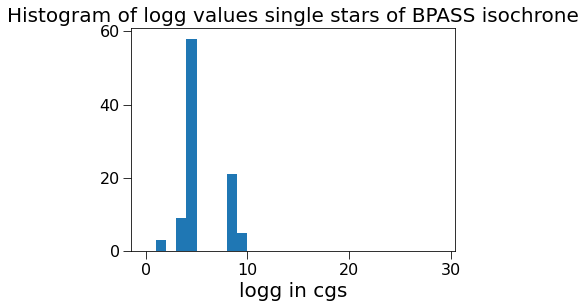

In [16]:
plt.title("Histogram of logg values single stars of BPASS isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

For comparison, let's create a Parsec isochrone  phot using otherwise same parameters.

In [17]:
iso2=synthetic.IsochronePhot(8.2, 0.0, 100, math.log10(1),
                             evo_model=evolution.Parsec(), recomp=True) # New Parsec isochrone for same metallicity

Isochrone generation took 21.120362 s.
Making photometry for isochrone: log(t) = 8.20  AKs = 0.00  dist = 100
     Starting at:  2021-07-22 14:10:18.937554   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.01 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2491 K  m_ubv_U = 26.30
M =   4.155 Msun  T = 11703 K  m_ubv_U = 2.87
M =   4.371 Msun  T =  4036 K  m_ubv_U = 5.84
Starting filter: ubv,B   Elapsed time: 0.68 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2491 K  m_ubv_B = 24.47
M =   4.155 Msun  T = 11703 K  m_ubv_B = 3.18
M =   4.371 Msun  T =  4036 K  m_ubv_B = 3.89
Starting filter: ubv,V   Elapsed time: 1.35 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2491 K  m_ubv_V = 22.76
M =   4.155 Msun  T = 11703 K  m_ubv_V = 3.28
M =   4.371 Msun  T =  4036 K  m_ubv_V = 2.35
Starting filter: ubv,R   Elapsed time: 2.01 seconds
Starting synthetic photometry
M =   0.090 Msun  T =  2491 K  m_ubv_R = 20.76
M =   4.155 Msun  T = 117

Find the maximum logg of the isochrone and the distribution of logg values of the new isochrone.

In [18]:
np.max(iso2.points['logg'])

4.8974

(array([14., 56., 26., 36., 84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

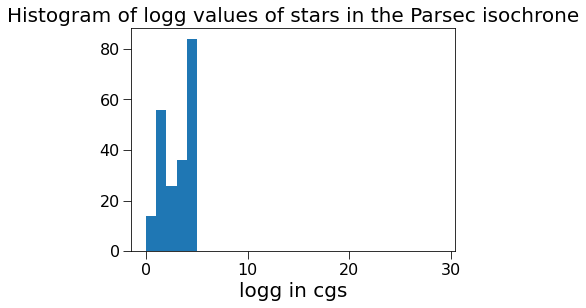

In [19]:
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the Parsec isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

Finding the log_g median and mean for the new isochronePhot

In [20]:
np.median(iso2.points['logg'])

3.4698

In [21]:
np.mean(iso2.points['logg'])

3.0808240740740738

Now we want to make clusters for both of these models and plot CMD, HR Diagram, and Mass Luminosity relationship for the isochrones. Then, we want to find the Mass luminosity relationship and CMD for the cluster.

In [22]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr

In [23]:
clus_1=synthetic.Cluster_w_Binaries(iso1,
                                    imf.IMFSalpeter1955(multiplicity=
                                                        multiplicity.MultiplicityResolvedDK()),
                                    2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2,
                                 imf.IMFSalpeter1955(multiplicity=
                                                     multiplicity.MultiplicityResolvedDK()),
                                 2000, ifmr=ifmr.IFMR_Spera15())

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:752: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Interpolation for: Teff


QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 3 is coplanar with the interior point)

While executing:  | qhull d Qbb Qc Qz Qt Q12
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 881786710  delaunay  Qbbound-last  Qcoplanar-keep  Qz-infinity-point
  Qtriangulate  Q12-allow-wide  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 1e+20  Error-roundoff 2e+05  _one-merge 1.8e+06
  Visible-distance 1.2e+06  U-max-coplanar 1.2e+06  Width-outside 2.4e+06
  _wide-facet 7.3e+06  _maxoutside 2.4e+06

The input to qhull appears to be less than 4 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p2793(v5):   3.3   2.8 5.3e+18 1e+20
- p5(v4):   0.5   3.5 1e+20 9.1e+19
- p2295(v3):   7.9 1e+02  -1.8 9.1e-17
- p908(v2):   9.5   2.9  -0.8 8.7e-19
- p2068(v1):   0.2     4 -0.17 1.1e-19

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 2e+05.  The center point, facets and distances
to the center point are as follows:

center point    4.282    22.63 2.106e+19 3.818e+19

facet p5 p2295 p908 p2068 distance= -1.4e+19
facet p2793 p2295 p908 p2068 distance= -1.9e+19
facet p2793 p5 p908 p2068 distance=  -19
facet p2793 p5 p2295 p2068 distance= -1.9
facet p2793 p5 p2295 p908 distance= -1.9

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:    0.1995       9.5  difference=  9.3
  1:      0.19       100  difference= 99.81
  2:    -2.127     1e+20  difference= 1e+20
  3:         0     1e+20  difference= 1e+20

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 2e+05.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


Taking a look at the BPASS Cluster vs Parsec cluster CMD
Remember to subtract from V a distance modulus! 5$log_{10}$(distance to cluster/(10 pc))

In [ ]:
plt.figure(figsize = (7.5, 7.5))
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(100 / 10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(100 / 10), "r.")
plt.plot(iso1.singles['m_ubv_B'] - iso1.singles["m_ubv_V"],
         iso1.singles["m_ubv_V"] - 5 * np.log10(100 / 10),
         "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"],
         iso2.points["m_ubv_V"] - 5 * np.log10(100 / 10),
         "b+", label="Parsec Isochrone", alpha=0.25)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

Taking a look at the BPASS Cluster vs Parsec Settings cluster CMD
Remember to subtract from V a distance modulus! 5$log_{10}$(distance to cluster/(10 pc))

In [ ]:
plt.figure(figsize = (7.5, 7.5))
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.")
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.")
plt.plot(np.log10(iso1.singles['Teff']),
         np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['Teff']),
         np.log10(iso2.points["L"]), "b+", label="Parsec Isochrone", alpha=0.25)
plt.xlabel("log10($T_{eff}$ in kelvin)")
plt.ylabel("log10(L in watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

Plot the mass-luminosity relationship

In [ ]:
from astropy import constants as cs
plt.figure(figsize = (7.5, 7.5))
plt.plot(np.log10(iso1.primaries['mass_current']),
         np.log10(iso1.primaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']),
         np.log10(iso1.secondaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun),
         "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun),
         "b+", label="Parsec Isochrone", alpha=0.25)
plt.xlabel("log10(Current Mass in solar masses)")
plt.ylabel("log10(L/L_solar)")
plt.title("log Mass-logL of Isochrones at solar metallicity and 10**8.2 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

In [ ]:
# Plot the mass-luminosity relationship
from astropy import units as u
plt.figure(figsize = (7.5, 7.5))
plt.plot(np.log10(clus_1.star_systems['mass_current']),
         np.log10(clus_1.star_systems["L"] / cs.L_sun),
         "r.", label="Binary_Cluster made from BPASS", alpha =1)
plt.plot(np.log10(clus_2.star_systems['mass_current']),
         np.log10(clus_2.star_systems["L"] / (cs.L_sun * 1 / u.W)),
         "b+", label="Cluster made from Parsec", alpha=0.1)
plt.xlabel("log10(Current Mass in solar masses)")
plt.ylabel("log10(L/L_solar)")
plt.title("log-Mass-logL of Cluster at solar metallicity and" +
          " 10**8.2 years age (for primaries and single stars)")
plt.legend()
# Rough pattern seems to fit. What's that line?

Taking a look at the BPASS Cluster vs "Parsec Settings cluster" Observer's HR Diagram
Remember to use a distance modulus!

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7.5, 7.5))
plt.plot(clus_1.star_systems['m_ubv_B'] - clus_1.star_systems["m_ubv_V"],
         clus_1.star_systems["m_ubv_V"] - 5 * np.log10(100 / 10), "r.",
         label="BPASS Cluster")
plt.plot(clus_2.star_systems['m_ubv_B'] - clus_2.star_systems["m_ubv_V"],
         clus_2.star_systems["m_ubv_V"] - 5 * np.log10(100 / 10), "b+",
         label="Parsec Cluster", alpha=0.25)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

One thing to note about the Binary_Cluster is that it does include the units as information for columns.
The usual ResolvedCluster does not. Thus the latter has a disadvantage when we do comparisons with solar luminosity.

Looking at the total mass of the cluster

In [ ]:
clus_1.star_systems['systemMass'].sum()

In [ ]:
np.unique(clus_1.star_systems['phase'])

In [ ]:
clus_1=synthetic.Cluster_w_Binaries(iso1,
                                    imf.IMFSalpeter1955(multiplicity=
                                                        multiplicity.MultiplicityResolvedDK()),
                                    2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2,
                                 imf.IMFSalpeter1955(multiplicity=
                                                     multiplicity.MultiplicityResolvedDK()),
                                 2000, ifmr=ifmr.IFMR_Spera15())